## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## EDA
### Reading File

In [3]:
d=pd.read_csv("Iris.csv")
print(d.head())
print(d['Species'].unique())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


There are 3 output classes

### Checking for Null Values, Duplicate Values and Encoding the Categorical Column

In [4]:
print('null values = ' + str(d.isna().sum()))
print('duplicates = ' +str(d.duplicated().sum()))
df=d
df['Species']=d['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

null values = Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
duplicates = 0


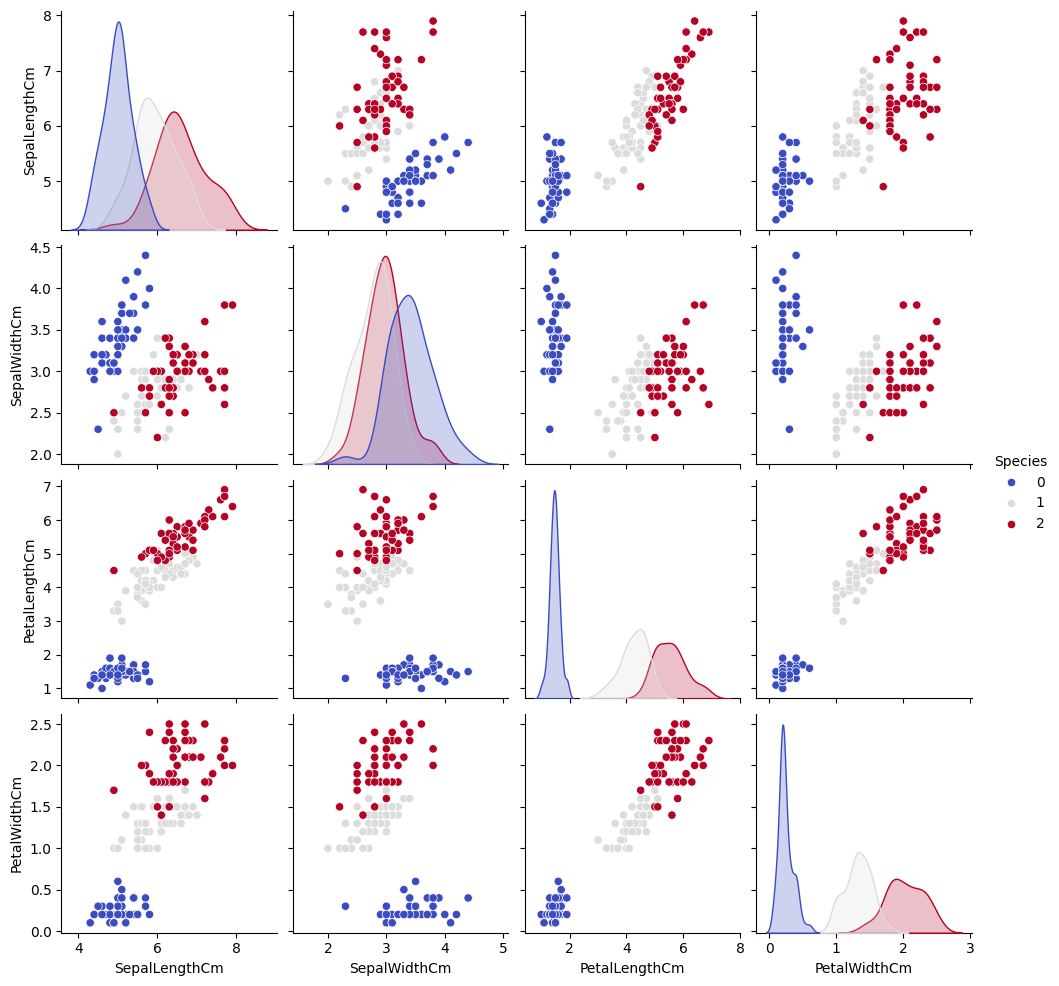

In [8]:
sns.pairplot(data=df.drop('Id', axis=1), hue='Species', palette='coolwarm')

## Data Preparation
### Splitting X and y

In [9]:
y=df['Species']
X=df.drop('Species',axis=1)
print(X.head())
print(y.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2
0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


### Splitting Train and Test Datasets

In [10]:
X_tr,X_te,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_tr.shape

(105, 5)

### Checking for Balance of Classes

In [11]:
y_train.value_counts()

Species
1    37
2    37
0    31
Name: count, dtype: int64

The data needs to be balanced by oversampling since the value count of class 0 is less than the other 2 classes

### Data Standardization

In [12]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_tr)
X_test=scaler.transform(X_te)
X_train[:3]

array([[ 0.07890874, -0.4134164 , -1.46440146, -0.10014569, -0.32149987],
       [ 1.32052747,  0.55122187, -0.49582097,  0.71771076,  0.35364985],
       [ 1.41603661,  0.67180165,  0.2306144 ,  0.95138404,  0.75873969]])

### Oversampling, Model Fitting and Predicting
#### Using SMOTE (Synthetic Minority Oversampling Technique)
###### from imblearn.over_sampling import SMOTE
###### sm=SMOTE(random_state=42)
###### X_trainb,y_trainb=sm.fit_resample(X_train,y_train)
###### y_trainb.value_counts()
#### Using Random Over Sampler
###### from imblearn.over_sampling import RandomOverSampler
###### ros=RandomOverSampler(random_state=42)
###### X_trainb,y_trainb=ros.fit_resample(X_train,y_train)
###### y_trainb.value_counts()

Since imbalance learn is causing errors (compatibility issues), we use class weights in Logistic Regression model (with multinomial class, quasi newton method, weight=1/frequency

In [14]:
lg=LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=1000)
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)

### Model Evaluation

Accuracy:  1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



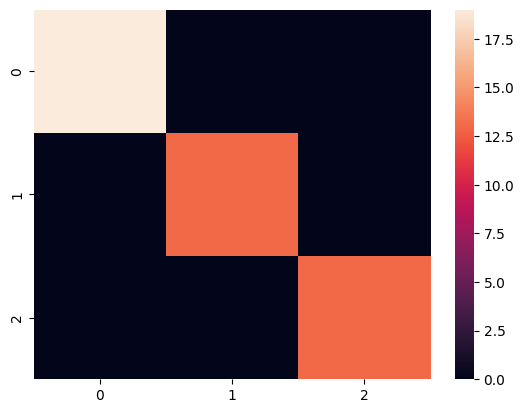

In [17]:
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Classification report:\n', metrics.classification_report(y_test,y_pred))
sns.heatmap(cm)
plt.show()